In [1]:
import numpy as np
from SGTPy import component, mixture, saftvrmie
from SGTPy.equilibrium import lle, lle_init
from SGTPy.sgt import sgt_mix_beta0
import matplotlib.pyplot as plt 

In [2]:
# creating pure components
water = component('water', ms = 1.7311, sigma = 2.4539 , eps = 110.85,
                    lambda_r = 8.308, lambda_a = 6., eAB = 1991.07, rcAB = 0.5624,
                    rdAB = 0.4, sites = [0,2,2], cii = 1.5371939421515458e-20)

butanol = component('butanol2C', ms = 1.9651, sigma = 4.1077 , eps = 277.892,
                    lambda_r = 10.6689, lambda_a = 6., eAB = 3300.0, rcAB = 0.2615,
                    rdAB = 0.4, sites = [1,0,1], npol = 1.45, mupol = 1.6609,
                    cii  = 1.5018715324070352e-19)

# optimized from experimental LLE
kij, lij = np.array([-0.00736075, -0.00737153])

Kij = np.array([[0, kij], [kij, 0]])
Lij = np.array([[0., lij], [lij, 0]])
mix = mixture(water, butanol)
# setting interactions corrections
mix.kij_saft(Kij)
mix.lij_saft(Lij)
# creating eos model
eos = saftvrmie(mix)

In [3]:
T = 298.15 # K
P = 1.01325e5 # Pa

# global composition
z = np.array([0.8,0.2])
# initial composition obtained from tpd minimization
x0, w0 = lle_init(z, T, P, eos)
# LLE is performed as a flash that search stable phases
sol = lle(x0, w0, z, T, P, eos, full_output = True)
sol

           T: 298.15
           P: 101325.0
 error_outer: 2.9301051053630686e-11
 error_inner: 1.2568891279627914e-10
        iter: 19
        beta: array([0.62430571, 0.37569429])
       tetha: array([0.])
           X: array([[0.96022175, 0.03977825],
       [0.53375333, 0.46624667]])
           v: [2.031421326505555e-05, 5.136076449089711e-05]
        Xass: [array([0.05681887, 0.07391655, 0.01687656, 0.03815009]), array([0.06370414, 0.19812489, 0.02977361, 0.1168179 ])]
      states: ['L', 'L']

In [4]:
#reading the solution information
X, W = sol.X
vx, vw = sol.v
# computing density vectors 
rhox = X/vx
rhow = W/vw

In [5]:
# computing IFT with SGT
solsgt = sgt_mix_beta0(rhow, rhox, T, P, eos, full_output = True)

Text(0, 0.5, '$\\rho$ / kmol m$^{-3}$')

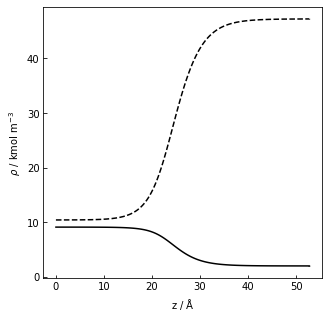

In [6]:
rho = solsgt.rho/1000
zs = solsgt.z

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)

ax.plot(zs, rho[1], color = 'k')
ax.plot(zs, rho[0], '--',color ='k')
ax.tick_params(direction = 'in')
ax.set_xlabel(r'z / $\rm \AA$')
ax.set_ylabel(r'$\rho$ / kmol m$^{-3}$')